# Python de cero a experto
**Autor:** Luis Miguel de la Cruz Salas

<a href="https://github.com/luiggix/Python_cero_a_experto">Python de cero a experto</a> by Luis M. de la Cruz Salas is licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

## Universal Functions (*ufunc*)

Una función universal (*ufunc*) es aquella que opera sobre arreglos de numpy (´ndarrays´) elemento por elemento, soportando *broadcasting* y *casting*, entre otras características estándares. 

- Se dice que una *ufunc* es un envoltorio (*wrapper*) vectorizado para una función que toma un número fijo de entradas específicas y produce un número de salidas específicas.

- En NumPy, las funciones universales son objetos de la clase ´numpy.ufunc´. 

- Muchas de estas funciones están implementadas y compiladas en lenguaje C. 

- Las *ufunc* básicas operan sobre escalares, pero existe también un tipo generalizado para el cual los elementos básicos son subarreglos (vectores, matrices, etc.) y se realiza un *broadcasting* sobre las otras dimensiones. 

### Broadcasting
La siguiente figura muestra varios tipo de *broadcasting* que se aplican en los arreglos y funciones de Numpy. 

<img src="./Figuras/Broadcasting.png"  style="width: 500px;"/>

**Observación**: Los cuadros en gris tenue son usados para mostrar el concepto de *broadcasting*, pero no se reserva memoria para ellos.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.arange(3)
x

array([0, 1, 2])

In [4]:
y = x + 5
y

array([5, 6, 7])

In [5]:
matriz = np.ones((3,3))
matriz

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [6]:
vector = np.arange(3)
vector

array([0, 1, 2])

In [7]:
matriz + vector

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [8]:
columna = np.arange(3).reshape(3,1)
columna

array([[0],
       [1],
       [2]])

In [9]:
renglon = np.arange(3)
renglon

array([0, 1, 2])

In [10]:
columna + renglon

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [11]:
columna * renglon

array([[0, 0, 0],
       [0, 1, 2],
       [0, 2, 4]])

**Reglas del broadcasting**<br>

Para determinar la interacción entre dos arreglos, en Numpy se siguen las siguientes reglas:

* **Regla 1**. Si dos arreglos difieren en sus dimensiones, el *shape* del que tiene menos dimensiones es completado con unos sobre su lado izquierdo
* **Regla 2**. Si el *shape* de los dos arreglos no coincide en alguna dimensión, el arreglo con el *shape* igual a 1  se completa para que coincida con el *shape* del otro arreglo.
* **Regla 3**. Si el *shape* de los dos arreglos no coincide en alguna dimensión, pero ninguna de las dos es igual a 1 entonces se tendrá un error del estilo:

```python
ValueError: operands could not be broadcast together with shapes (4,3) (4,) 
```

#### Ejemplo 1.

In [12]:
Mat = np.ones((3,2))
b = np.arange(2)
print(Mat.shape)
print(Mat)
print(b.shape)
print(b)

(3, 2)
[[1. 1.]
 [1. 1.]
 [1. 1.]]
(2,)
[0 1]


Cuando se vaya a realizar una operación con estos dos arreglos, por la **Regla 1** lo que Numpy hará internamente es:
```
Mat.shape <--- (3,2)
b.shape   <--- (1,2)
```

Luego, por la **Regla 2** se completa la dimensión del *shape* del arreglo `b` que sea igual 1:
```
Mat.shape <--- (3,2)
b.shape   <--- (3,2)
```
De esta manera es posible realizar operaciones entre ambos arreglos:

In [13]:
Mat + b

array([[1., 2.],
       [1., 2.],
       [1., 2.]])

In [14]:
Mat * b

array([[0., 1.],
       [0., 1.],
       [0., 1.]])

#### Ejemplo 2.

In [15]:
Mat = np.ones((3,1))
b = np.arange(4)
print(Mat.shape)
print(Mat)
print(b.shape)
print(b)

(3, 1)
[[1.]
 [1.]
 [1.]]
(4,)
[0 1 2 3]


Por la **Regla 1** lo que Numpy hará internamente es:
```
Mat.shape <--- (3,1)
b.shape   <--- (1,4)
```

Por la **Regla 2** se completan las dimensiones de los arreglos que sean igual 1:
```
Mat.shape <--- (3,4)
b.shape   <--- (3,4)
```
De esta manera es posible realizar operaciones entre ambos arreglos:

In [16]:
Mat + b

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

#### Ejemplo 3.

In [17]:
Mat = np.ones((4,3))
b = np.arange(4)
print(Mat.shape)
print(Mat)
print(b.shape)
print(b)

(4, 3)
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
(4,)
[0 1 2 3]


Por la **Regla 1** lo que Numpy hará internamente es:
```
Mat.shape <--- (4,3)
b.shape   <--- (1,4)
```

Por la **Regla 2** se completan las dimensiones de los arreglos que sean igual 1:
```
Mat.shape <--- (4,3)
b.shape   <--- (4,4)
```
Observe que en este caso los shapes de los arreglos no coinciden, por lo que no será posible operar con ellos juntos.

In [18]:
Mat + b

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

In [19]:
Mat.shape = (3,4)
Mat

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [20]:
Mat + b

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

In [21]:
Mat + b[np.newaxis,:].T

ValueError: operands could not be broadcast together with shapes (3,4) (4,1) 

### Ufunc disponibles en Numpy
Para una lista completa de todas las funciones universales disponibles en Numpy refierase al siguiente sitio:
https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs .

#### Ejemplo 4.

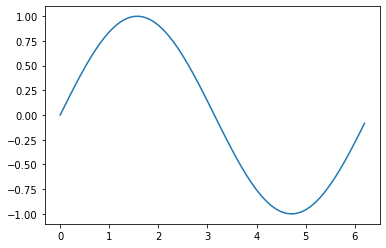

In [22]:
x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x)
plt.plot(x,y)

#### Ejemplo 5.

In [23]:
x = np.linspace(0, 10, 100)                # Vector renglón
y = np.linspace(0, 10, 100)#[:, np.newaxis] # Vector columna
z = x * y
print(f' x.shape = {x.shape} \n y.shape = {y.shape} \n z.shape = {z.shape}')

 x.shape = (100,) 
 y.shape = (100,) 
 z.shape = (100,)


In [24]:
z

array([0.00000000e+00, 1.02030405e-02, 4.08121620e-02, 9.18273646e-02,
       1.63248648e-01, 2.55076013e-01, 3.67309458e-01, 4.99948985e-01,
       6.52994592e-01, 8.26446281e-01, 1.02030405e+00, 1.23456790e+00,
       1.46923783e+00, 1.72431385e+00, 1.99979594e+00, 2.29568411e+00,
       2.61197837e+00, 2.94867871e+00, 3.30578512e+00, 3.68329762e+00,
       4.08121620e+00, 4.49954086e+00, 4.93827160e+00, 5.39740843e+00,
       5.87695133e+00, 6.37690032e+00, 6.89725538e+00, 7.43801653e+00,
       7.99918376e+00, 8.58075707e+00, 9.18273646e+00, 9.80512193e+00,
       1.04479135e+01, 1.11111111e+01, 1.17947148e+01, 1.24987246e+01,
       1.32231405e+01, 1.39679625e+01, 1.47331905e+01, 1.55188246e+01,
       1.63248648e+01, 1.71513111e+01, 1.79981635e+01, 1.88654219e+01,
       1.97530864e+01, 2.06611570e+01, 2.15896337e+01, 2.25385165e+01,
       2.35078053e+01, 2.44975003e+01, 2.55076013e+01, 2.65381084e+01,
       2.75890215e+01, 2.86603408e+01, 2.97520661e+01, 3.08641975e+01,
      

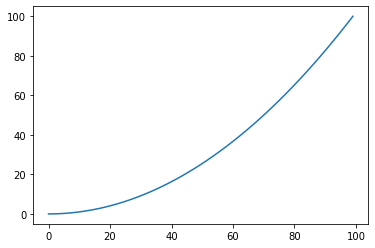

In [25]:
plt.plot(z)

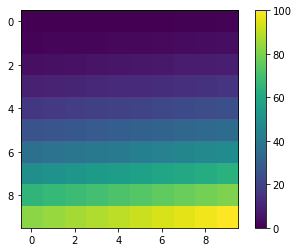

In [26]:
i = plt.imshow(z.reshape((10,10)))
plt.colorbar(i)

 x.shape = (100,) 
 y.shape = (100,) 
 z.shape = (100,)


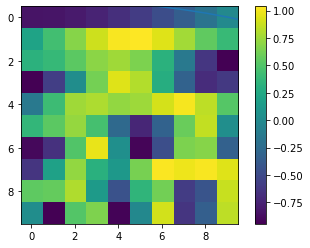

In [32]:
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
print(f' x.shape = {x.shape} \n y.shape = {y.shape} \n z.shape = {z.shape}')
plt.plot(z)
i = plt.imshow(z.reshape((10,10)))
plt.colorbar(i)

## Álgebra lineal

In [39]:
A = np.linspace(1,9,9).reshape(3,3)
B = np.linspace(1,9,9).reshape(3,3)
a = np.linspace(1,3,3)
b = np.linspace(1,3,3)
print(A)
print(B)
print(a)
print(b)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[1. 2. 3.]
[1. 2. 3.]


In [40]:
A.T # Transpuesta de la matriz

array([[1., 4., 7.],
       [2., 5., 8.],
       [3., 6., 9.]])

In [41]:
a * b # Producto de dos vectores elemento por elemento

array([1., 4., 9.])

In [42]:
A * B # Producto de dos matrices elemento por elemento

array([[ 1.,  4.,  9.],
       [16., 25., 36.],
       [49., 64., 81.]])

In [43]:
np.dot(a,b) # Producto punto de dos vectores

14.0

In [44]:
a @ b # Producto punto de dos vectores

14.0

In [45]:
np.dot(A,b) # Producto matriz - vector

array([14., 32., 50.])

In [46]:
A @ b # Producto matriz - vector

array([14., 32., 50.])

In [47]:
np.dot(A,B) # Producto matriz - matriz

array([[ 30.,  36.,  42.],
       [ 66.,  81.,  96.],
       [102., 126., 150.]])

In [48]:
A @ B  # Producto matriz - matriz

array([[ 30.,  36.,  42.],
       [ 66.,  81.,  96.],
       [102., 126., 150.]])

In [49]:
c = b[:,np.newaxis] # Agregamos una dimension al vector (vector columna)
print(c.shape)
print(c)

(3, 1)
[[1.]
 [2.]
 [3.]]


In [50]:
c * a # Producto externo: vector columna por vector renglón

array([[1., 2., 3.],
       [2., 4., 6.],
       [3., 6., 9.]])

### Paquete `linalg`

Esta biblioteca ofrece varios algorimos para aplicarlos sobre arreglos de numpy (véa <a href="https://numpy.org/doc/stable/reference/routines.linalg.html">aquí</a> la referencia).
Todas operaciones de álgebra lineal de Numpy se basan en las bibliotecas
BLAS (<a href="http://www.netlib.org/blas/">Basic Linear Algebra Suprograms</a> ) y 
LAPACK (<a href="http://www.netlib.org/lapack/">Linear Algebra Package </a>) para proveer de implementaciones eficientes de bajo nivel de los algoritmos estándares. 

Estas biblioteca pueden proveer de versiones altamente optimizadas para aprovechar el hardware óptimamente (multihilos y multiprocesador). En estos casos se hace uso de bibliotecas tales como OpenBLAS, MKL (TM), y/o ATLAS.

In [51]:
np.show_config() # Para conocer la configuración del Numpy que tengo instalado

blas_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/luiggi/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/luiggi/anaconda3/include']
blas_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/luiggi/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/luiggi/anaconda3/include']
lapack_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/luiggi/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/luiggi/anaconda3/include']
lapack_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/luiggi/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/luiggi/anaconda3/include']


#### Ejemplo 6.

Cruce de dos rectas:<br>

$
\begin{array}{ccc}
3x_0 + 2x_1 & = &2 \\
2x_0 + 6x_1 & = &-8
\end{array}
$

En forma de sistema lineal:

$
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right]
$
$
\left[
\begin{array}{c}
x_{0} \\
x_{1}
\end{array} \right] =
$
$
\left[
\begin{array}{c}
2 \\ 
-8
\end{array} \right]
$

Podemos calcular el cruce de las rectas resolviendo el sistema lineal:

In [52]:
A = np.array([[3, 2],[2,6]] )
b = np.array([2,-8])
print("Matriz A : \n",A)
print("Vector b : \n", b)
sol = np.linalg.solve(A,b) # Función del módulo linalg para resolver el sistema
print("Solución del sistema: ", sol)

Matriz A : 
 [[3 2]
 [2 6]]
Vector b : 
 [ 2 -8]
Solución del sistema:  [ 2. -2.]


**Graficamos las rectas y la solución:**

Las ecuaciones de las rectas se pueden escribir como:

$
\begin{array}{ccc}
\dfrac{3}{2}x_0 + x_1 & = & \dfrac{2}{2} \\
\dfrac{2}{6}x_0 + x_1 & = & -\dfrac{8}{6}
\end{array} \Longrightarrow
\begin{array}{ccc}
y_0 = m_0 x + b_0 \\
y_1 = m_1 x + b_1
\end{array} \text{ donde }
\begin{array}{ccc}
m_0 = -\dfrac{3}{2} & b_0 = 1 \\
m_1 = -\dfrac{2}{6} & b_1 = -\dfrac{8}{6}
\end{array}
$

In [53]:
def graficaRectas(x, y0, y1, sol):
    plt.plot(x,y0,lw=3,label = '$3x_0+2x_1=2$')
    plt.plot(x,y1,lw=3,label = '$2x_0+6x_1=-8$')
    plt.scatter(sol[0], sol[1], c='red', s = 75, alpha=0.75, zorder=5, label='Solución')
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    plt.title('Cruce de rectas')
    plt.grid()
    plt.legend()

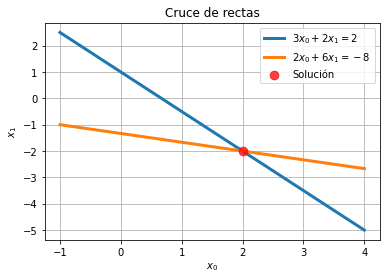

In [54]:
m0 = -3/2
b0 = 1
m1 = -2/6
b1 = -8/6
x = np.linspace(-1,4,10)
y0 = m0 * x + b0
y1 = m1 * x + b1 

graficaRectas(x, y0, y1, sol)

In [55]:
eigen = np.linalg.eig(A)
eigen

(array([2., 7.]),
 array([[-0.89442719, -0.4472136 ],
        [ 0.4472136 , -0.89442719]]))

In [56]:
def dibujaEigen(eigen, sol):
    xv,yv = np.meshgrid([sol[0], sol[0]],[sol[1], sol[1]])
    u = np.hstack( (eigen[1][0], np.array([0, 0])) ) 
    v = np.hstack( (eigen[1][1], np.array([0, 0])) )   
    vec = plt.quiver(xv,yv,u,v,scale=10, zorder=5)

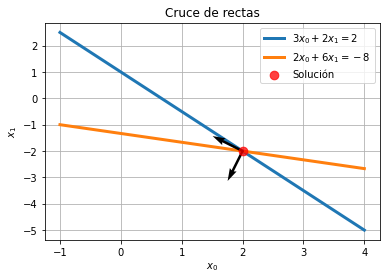

In [57]:
dibujaEigen(eigen, sol)
graficaRectas(x, y0, y1, sol)

### Forma cuadrática

$ f(x) = \dfrac{1}{2} \mathbf{x}^T A \mathbf{x} - \mathbf{x}^T \mathbf{b} + c $

$
A =
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right],
x =
\left[
\begin{array}{c}
x_{0} \\
x_{1}
\end{array} \right],
b =
\left[
\begin{array}{c}
2\\ -8
\end{array}
\right], 
c =
\left[
\begin{array}{c}
0\\ 0
\end{array}
\right], 
$

$ f^\prime(x) = \dfrac{1}{2} A^T \mathbf{x} + \dfrac{1}{2} A \mathbf{x} - \mathbf{b} $

- Cuando $A$ es simétrica: $ f^\prime(x) = A \mathbf{x} - \mathbf{b} $
- Entonces un punto crítico de $f(x)$ se obtiene cuando $ f^\prime(x) = A \mathbf{x} - \mathbf{b} = 0$, es decir cuando $A \mathbf{x} = \mathbf{b}$


In [58]:
from mpl_toolkits.mplot3d import Axes3D

def dibujaSurf(A,b):
    def f(A,b,x,c):
        return 0.5 * (x.T * A * x) - b.T * x + c

    size_grid = 30
    x1 = np.linspace(-3,6,size_grid)
    y1 = np.linspace(-6,3,size_grid)

    xg,yg = np.meshgrid(x1,y1)
    z = np.zeros((size_grid, size_grid))

    for i in range(size_grid):
        for j in range(size_grid):
            x = np.matrix([[xg[i,j]],[yg[i,j]]])
            z[i,j] = f(A,b,x,0)
            
    fig = plt.figure()
    surf = fig.gca(projection='3d')
    surf.plot_surface(xg,yg,z,rstride=1,cstride=1, alpha=1.0, cmap='viridis')
    surf.view_init(15, 130)
    surf.set_xlabel('$x_0$')
    surf.set_ylabel('$x_1$')
    surf.set_zlabel('$f$')
    return xg, yg, z

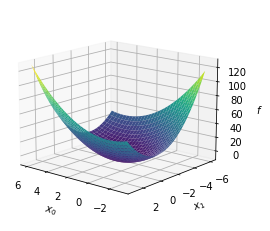

In [59]:
xg,yg,z = dibujaSurf(A,b)

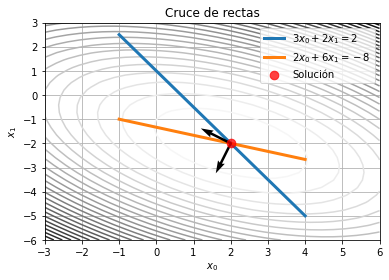

In [60]:
dibujaEigen(eigen, sol)
graficaRectas(x, y0, y1, sol)
cont = plt.contour(xg,yg,z,30,cmap='binary')

**Algoritmo del descenso del gradiente** <br>
$
\begin{array}{l}
\text{Input} : \mathbf{x}_0, tol \\
\mathbf{r}_0 = \mathbf{b}-A\mathbf{x}_0 \\
k = 0 \\
\text{WHILE}(\mathbf{r}_k > tol) \\
\qquad \mathbf{r}_k \leftarrow \mathbf{b}-A\mathbf{x}_k \\
\qquad \alpha_k \leftarrow \dfrac{\mathbf{r}_k^T\mathbf{r}_k}{\mathbf{r}_k^T A \mathbf{r}_k} \\
\qquad \mathbf{x}_{k+1} \leftarrow \mathbf{x}_k + \alpha_k \mathbf{r}_k \\
\qquad k \leftarrow k + 1 \\
\text{ENDWHILE}
\end{array}
$

In [61]:
def steepest(A,b,x,tol,kmax):
    steps = [[x[0,0], x[1,0]]]
    r = b - A @ x
    res = np.linalg.norm(r)
    k = 0
    while(res > tol and k < kmax):
        alpha = r.T @ r / (r.T @ A @ r)
        x = x + r * alpha
        steps.append([x[0,0],x[1,0]])
        r = b - A @ x
        res = np.linalg.norm(r)
        k += 1
        print(k, res)
    return x, steps

In [62]:
xini = np.array([-2.0,-2.0])
tol = 0.001
kmax = 20

xs, pasos = steepest(A,b[:,np.newaxis],xini[:,np.newaxis],tol,kmax)

1 5.384289904692891
2 3.5895266031285917
3 1.3400899318346766
4 0.8933932878897847
5 0.3335334941455197
6 0.22235566276367916
7 0.08301278076510733
8 0.055341853843404884
9 0.0206609587682041
10 0.013773972512135697
11 0.00514228307119734
12 0.0034281887141298767
13 0.001279857119940566
14 0.00085323807996087


In [63]:
def dibujaPasos(xi, sol, pasos):
    pasos = np.matrix(pasos)
    plt.plot(pasos[:,0],pasos[:,1],'-')
    plt.scatter(xi[0], xi[1], c='yellow', s = 75, alpha=0.75, zorder=5, label='Solución')
    plt.scatter(sol[0], sol[1], c='red', s = 75, alpha=0.75, zorder=5, label='Solución')

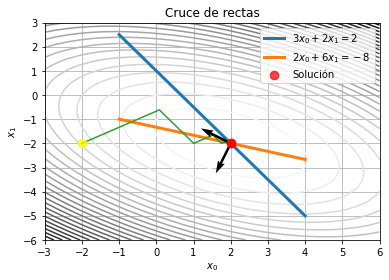

In [64]:
dibujaEigen(eigen, sol)
graficaRectas(x, y0, y1, sol)
cont = plt.contour(xg,yg,z,30,cmap='binary')
dibujaPasos(xini, sol, pasos)